# Problema 3: Calibración de sensor de distancia

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

## 1.- Análisis de datos

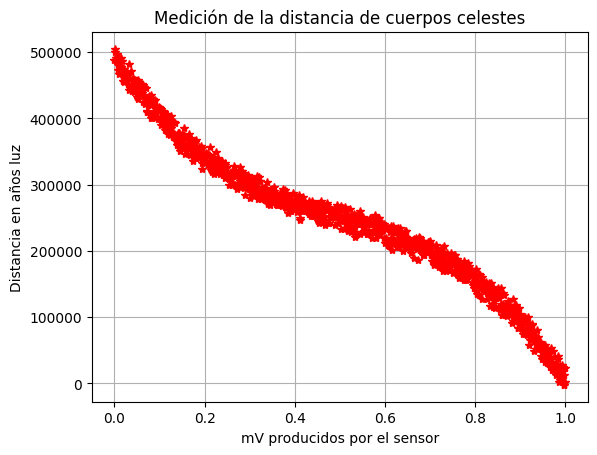

In [2]:
# Cargar datos
data = np.load("datos/datos_p2.npy")

# Extraer informacion
x = data[:, 0]
y = data[:, 1]

x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

x = x - np.min(x)
x = x / np.max(x)

# Graficar valores
plt.title("Medición de la distancia de cuerpos celestes")
plt.xlabel("mV producidos por el sensor")
plt.ylabel("Distancia en años luz")
plt.plot(x, y, "*", color="r")
plt.grid()
plt.show()


In [3]:
class CubicRegression:
    def __init__(self, learning_rate=0.001, epochs=10):
        self.weights = np.random.rand(4)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def loss_function(self, z, y):
        return 0.5 * np.power(z - y, 2)

    def fit(self, X, y):
        n_samples = len(y)

        self.cost_history = np.zeros(self.epochs)

        for epoch in range(self.epochs):
            for X_i, y_i in zip(X, y):
                hypothesis = self.predict(X_i)

                self.cost_history[epoch] += self.loss_function(hypothesis, y_i)

                # Gradients
                de_y = hypothesis - y_i

                dy_a = np.power(X_i, 3)
                dy_b = np.power(X_i, 2)
                dy_c = X_i
                dy_d = 1.0

                de_a = de_y * dy_a
                de_b = de_y * dy_b
                de_c = de_y * dy_c
                de_d = de_y * dy_d

                self.weights[0] = self.weights[0] - self.learning_rate * de_a
                self.weights[1] = self.weights[1] - self.learning_rate * de_b
                self.weights[2] = self.weights[2] - self.learning_rate * de_c
                self.weights[3] = self.weights[3] - self.learning_rate * de_d

            self.cost_history[epoch] = self.cost_history[epoch] / n_samples

    def predict(self, X):
        a = np.power(X, 3) * self.weights[0]
        b = np.power(X, 2) * self.weights[1]
        c = X * self.weights[2]
        d = self.weights[3]
        return a + b + c + d


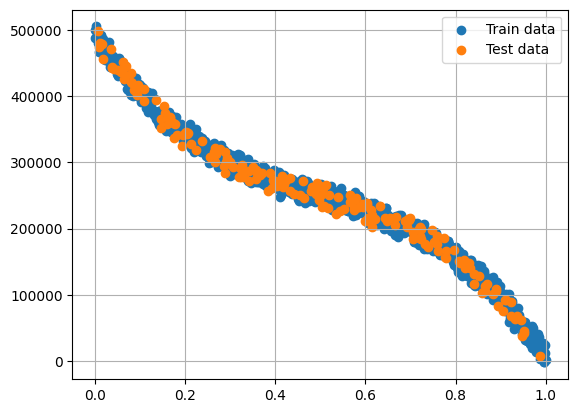

In [4]:
data_index = np.arange(len(y))
np.random.shuffle(data_index)

x_train = x[data_index[:800]]
x_test = x[data_index[800:]]
y_train = y[data_index[:800]]
y_test = y[data_index[800:]]


plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.grid(True)
plt.legend(["Train data", "Test data"])
plt.show()

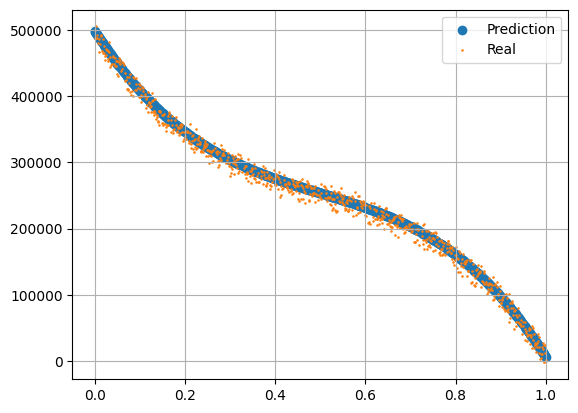

In [5]:
model = CubicRegression(learning_rate=0.3, epochs=500)


model.fit(x_train, y_train)
y_pred = model.predict(x_train)

plt.scatter(x_train, y_pred)
plt.scatter(x_train, y_train, s=0.7)
plt.grid(True)
plt.legend(["Prediction", "Real"])
plt.show()

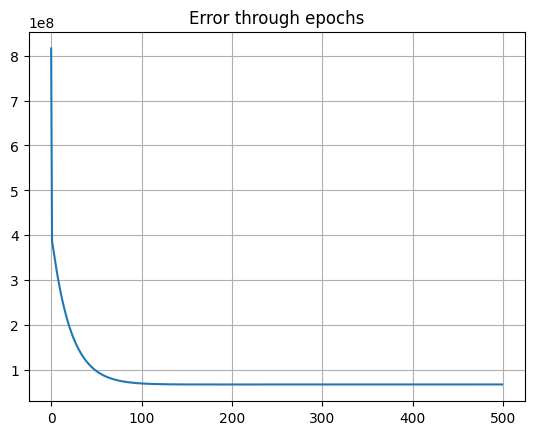

In [6]:
plt.plot(model.cost_history)
plt.title("Error through epochs")
plt.grid(True)
plt.show()


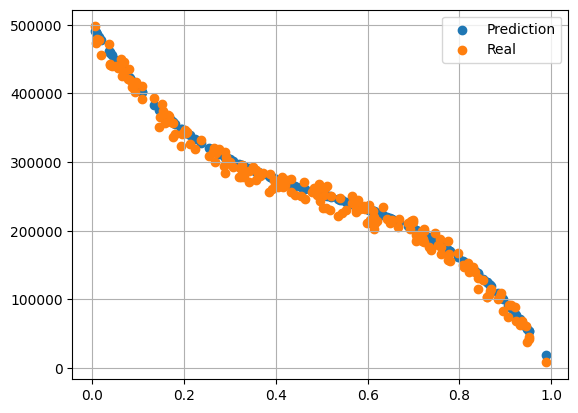

Model error
59074455.99459143


In [7]:
y_pred = model.predict(x_test)

plt.scatter(x_test, y_pred)
plt.scatter(x_test, y_test)
plt.legend(["Prediction", "Real"])
plt.grid()
plt.show()

print("Model error")
print(np.average(model.loss_function(y_pred, y_test)))


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5389d2e5-b4cc-4c7a-a515-5969c9747f61' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>